In [30]:
import pandas as pd
import yfinance as yf
import statsmodels.tsa.stattools as smt
import datetime
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import read_csv
from sklearn.linear_model import LinearRegression
import math
import numpy as np
import scipy.stats as stats
import statsmodels.stats.power as smp
from statsmodels.stats.power import TTestPower

In [221]:
trades = read_csv('C:/Users/ahrus/Работа/Stat_arb_analysis/trades.csv', sep=';', encoding='utf-8')
trades = trades.dropna(how='all')
trades = trades.drop(['Time','funding'], axis=1)
trades['Date'] = pd.to_datetime(trades['Date'], format='%d.%m.%Y')
trades = trades.set_index(['Date'])
trades['Profit'] = trades['Profit'].str.replace(',', '.').astype(float)
trades['fee'] = trades['fee'].str.replace(',', '.').astype(float)
trades['Price_change'] = trades['Price_change'].str.replace(',', '.').astype(float)
# trades.Profit = trades.Profit - trades.fee #учёт комиссии
trades.head()

,Active,Profit,Price_change,fee
Date,,,,
2023-04-13,ENSUSDT,-0.003,-0.02,0.01067
2023-04-13,ENSUSDT,0.000,0.00,0.01066
2023-04-13,ATOMUSDT,-3.135,-0.49,0.51471
2023-04-13,BNBUSDT,-7.660,-1.19,0.51287
2023-04-13,DOTUSDT,-0.779,-0.64,0.09761


In [222]:
trades_XMR = pd.DataFrame({'XMRUSDT': trades[trades.Active == 'XMRUSDT'].Profit})
trades_XMR.head()

,XMRUSDT
Date,
2023-04-13,0.40000
2023-04-11,26.80000
2023-04-10,11.06671
2023-04-09,14.44181
2023-04-07,-1.25000


In [223]:
trades_XMR = pd.DataFrame({'Profit': trades[trades.Active == 'XMRUSDT'].Profit})
# trades_XMR = trades_XMR.groupby('Date').sum()

trades_LTC = pd.DataFrame({'Profit': trades[trades.Active == 'LTCUSDT'].Profit})
# trades_LTC = trades_LTC.groupby('Date').sum()

trades_BNB = pd.DataFrame({'Profit': trades[trades.Active == 'BNBUSDT'].Profit})
# trades_BNB = trades_BNB.groupby('Date').sum()

trades_ATOM = pd.DataFrame({'Profit': trades[trades.Active == 'ATOMUSDT'].Profit})
# trades_ATOM = trades_ATOM.groupby('Date').sum()

trades_DOT = pd.DataFrame({'Profit': trades[trades.Active == 'DOTUSDT'].Profit})
# trades_DOT = trades_DOT.groupby('Date').sum()

trades_AR = pd.DataFrame({'Profit': trades[trades.Active == 'ARUSDT'].Profit})
# trades_AR = trades_AR.groupby('Date').sum()


In [224]:
len(trades_LTC)

60

In [225]:
trades_LTC_XMR = pd.DataFrame({'LTC': trades_LTC.Profit,'XMR': trades_XMR.Profit})
trades_LTC_XMR = trades_LTC_XMR.iloc[::-1]
trades_LTC_XMR['profit'] = trades_LTC_XMR.LTC +  trades_LTC_XMR.XMR
trades_LTC_XMR['cum'] = trades_LTC_XMR['profit'].cumsum()


trades_ATOM_BNB = pd.DataFrame({'ATOM': trades_ATOM.Profit,'BNB': trades_BNB.Profit})
trades_ATOM_BNB = trades_ATOM_BNB.iloc[::-1]
trades_ATOM_BNB['profit'] = trades_ATOM_BNB.ATOM +  trades_ATOM_BNB.BNB
trades_ATOM_BNB['cum'] = trades_ATOM_BNB['profit'].cumsum()


trades_AR_DOT = pd.DataFrame({'AR': trades_AR.Profit,'DOT': trades_DOT.Profit})
trades_AR_DOT = trades_AR_DOT.iloc[::-1]
trades_AR_DOT['profit'] = trades_AR_DOT.AR +  trades_AR_DOT.DOT
trades_AR_DOT['cum'] = trades_AR_DOT['profit'].cumsum()


trades_ATOM_BNB.head()

,ATOM,BNB,profit,cum
Date,,,,
2023-02-18,2.33200,11.36,13.69200,13.69200
2023-02-19,-8.84568,1.12,-7.72568,5.96632
2023-02-20,-1.12832,5.50,4.37168,10.33800
2023-02-21,25.67136,-2.36,23.31136,33.64936
2023-02-27,-42.72400,16.48,-26.24400,7.40536


------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше 14 долларов (p-value = 0.0159)
Статистическая мощность: 0.8067
Размер эффекта: 0.49628716109520504
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  27
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 40 долларов (p-value = 0.0032)
Статистическая мощность: 0.9355
Размер эффекта: 0.6252765769898401
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  18
------------------------------------------------------------------


C:\Users\ahrus\anaconda3\envs\pair_arb\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)


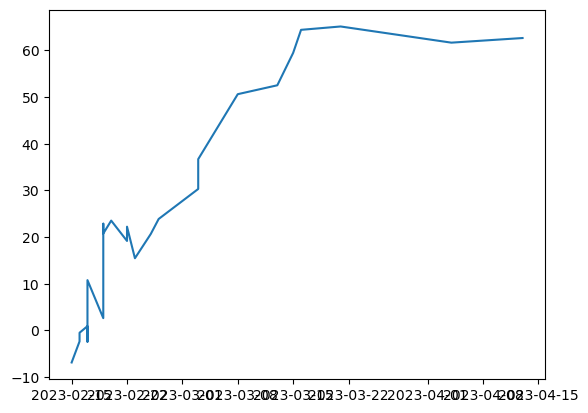

In [226]:
plt.plot(trades_AR_DOT.cum)
check_profit_hypothesis(trades_AR_DOT.cum, target_profit=14, alpha=0.05, desired_power=0.8)
check_profit_hypothesis(trades_AR_DOT.cum, target_profit=40, alpha=0.05, desired_power=0.8)

------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше 28 долларов (p-value = 0.0140)
Статистическая мощность: 0.8136
Размер эффекта: 0.43109815228975906
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  35
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 60 долларов (p-value = 0.0045)
Статистическая мощность: 0.9085
Размер эффекта: 0.50602804609762
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  26
------------------------------------------------------------------


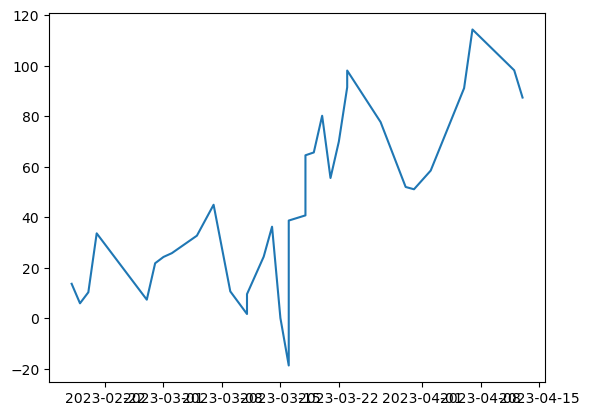

In [227]:
plt.plot(trades_ATOM_BNB.cum)
check_profit_hypothesis(trades_ATOM_BNB.cum, target_profit=28, alpha=0.05, desired_power=0.8)
check_profit_hypothesis(trades_ATOM_BNB.cum, target_profit=60, alpha=0.05, desired_power=0.8)

------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше -41 долларов (p-value = 0.0169)
Статистическая мощность: 0.7837
Размер эффекта: 0.31732164825295794
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  63
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше -1 долларов (p-value = 0.0145)
Статистическая мощность: 0.8012
Размер эффекта: 0.3253221891530914
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  60
------------------------------------------------------------------


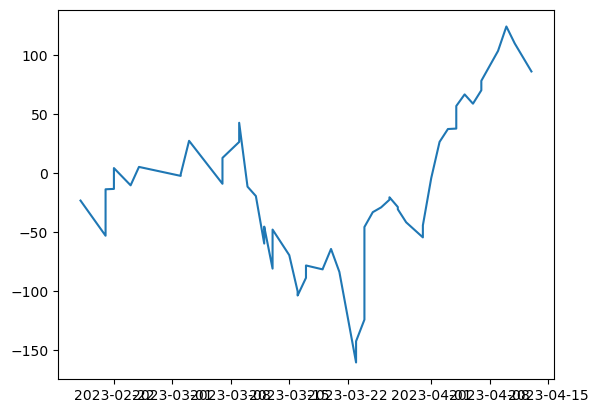

In [228]:
plt.plot(trades_LTC_XMR.cum)
check_profit_hypothesis(trades_LTC_XMR.cum, target_profit=-41, alpha=0.05, desired_power=0.8)
check_profit_hypothesis(trades_LTC_XMR.cum, target_profit=-1, alpha=0.05, desired_power=0.8)

# Непараметрический тест

In [229]:
check_profit_hypothesis_2(trades_AR_DOT.cum, target_profit=13, alpha=0.05, desired_power=0.8)
check_profit_hypothesis_2(trades_AR_DOT.cum, target_profit=14, alpha=0.05, desired_power=0.8)

------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше 13 долларов (p-value = 0.0436)
Статистическая мощность: 0.8608
Размер эффекта: 0.5394242279446299
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  23
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 14 долларов (p-value = 0.0655)
Статистическая мощность: 0.8067
Размер эффекта: 0.49628716109520504
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  27
------------------------------------------------------------------


In [230]:
check_profit_hypothesis_2(trades_ATOM_BNB.cum, target_profit=28, alpha=0.05, desired_power=0.8)
check_profit_hypothesis_2(trades_ATOM_BNB.cum, target_profit=30, alpha=0.05, desired_power=0.8)

------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше 28 долларов (p-value = 0.0348)
Статистическая мощность: 0.8136
Размер эффекта: 0.43109815228975906
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  35
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 30 долларов (p-value = 0.0668)
Статистическая мощность: 0.7077
Размер эффекта: 0.3725277648905479
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  46
------------------------------------------------------------------


In [231]:
check_profit_hypothesis_2(trades_LTC_XMR.cum, target_profit=-40, alpha=0.05, desired_power=0.8)
check_profit_hypothesis_2(trades_LTC_XMR.cum, target_profit=-20, alpha=0.05, desired_power=0.8)

------------------------------------------------------------------
Отвергаем нулевую гипотезу: прибыль стратегии больше -40 долларов (p-value = 0.0429)
Статистическая мощность: 0.7459
Размер эффекта: 0.3012555523178067
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  70
------------------------------------------------------------------
------------------------------------------------------------------
Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше -20 долларов (p-value = 0.6375)
Статистическая мощность: 0.0360
Размер эффекта: -0.020066366385217978
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  [10]
------------------------------------------------------------------


C:\Users\ahrus\anaconda3\envs\pair_arb\lib\site-packages\statsmodels\stats\power.py:415: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)


# Ещё тест

In [232]:
check_profit_hypothesis_3(trades_AR_DOT.cum, null_hypothesis=15)
print()
check_profit_hypothesis_3(trades_AR_DOT.cum, null_hypothesis=16)

Статистика: 261.0, p-значение: 0.042966701090335846
Отвергаем нулевую гипотезу. Средняя прибыль стратегии вероятно больше 15 долларов.

Статистика: 256.0, p-значение: 0.055525414645671844
Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше 16 долларов.


In [233]:
check_profit_hypothesis_3(trades_ATOM_BNB.cum, null_hypothesis=30)
print()
check_profit_hypothesis_3(trades_ATOM_BNB.cum, null_hypothesis=35)

Статистика: 450.0, p-значение: 0.0333983002055902
Отвергаем нулевую гипотезу. Средняя прибыль стратегии вероятно больше 30 долларов.

Статистика: 399.0, p-значение: 0.1537102531437995
Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше 35 долларов.


In [234]:
check_profit_hypothesis_3(trades_LTC_XMR.cum, null_hypothesis=-38)
print()
check_profit_hypothesis_3(trades_LTC_XMR.cum, null_hypothesis=-35)

Статистика: 1156.0, p-значение: 0.038019475065711794
Отвергаем нулевую гипотезу. Средняя прибыль стратегии вероятно больше -38 долларов.

Статистика: 1104.0, p-значение: 0.0820607251353862
Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше -35 долларов.


In [38]:
trades_ATOM_BNB.profit[trades_ATOM_BNB.profit < -10] = -10

In [46]:
trades_ATOM_BNB.head()

,ATOM,BNB,profit
Date,,,
2023-03-27,-52.11243,31.72,-20.39243
2023-03-23,-3.19000,9.80,6.61000
2023-03-23,37.01600,-15.52,21.49600
2023-03-22,54.32000,-39.90,14.42000
2023-03-21,-20.65588,-3.98,-24.63588


2.6786379310344826
17.623965828400173


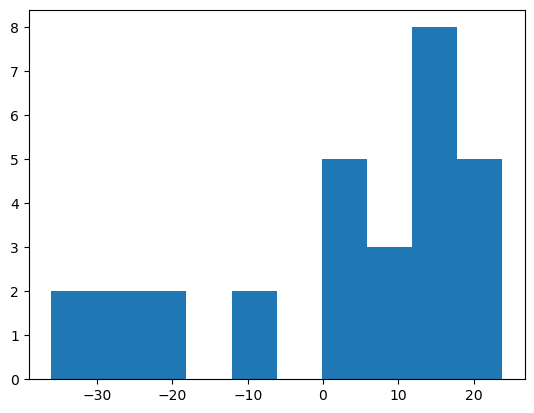

In [47]:
plt.hist(trades_ATOM_BNB.profit)
print(trades_ATOM_BNB.profit.mean())
print(trades_ATOM_BNB.profit.std())

# Справка

 - Статистическая значимость (p-value) - это вероятность получить наблюдаемые данные или более экстремальные при условии, что нулевая гипотеза верна. 
 - Уровень значимости (alpha) - это предварительно заданный порог, который определяет критическую область для проверки гипотезы. 0.05, что означает, что мы готовы совершить ошибку первого рода не чаще, чем в 5% случаев. Чем меньше - тем лучше.
 - Статистическая мощность - это вероятность обнаружения различий между группами, если различия действительно существуют. Или же это вероятность отклонения нулевой гипотезы, когда она действительно неверна. Чем больше - тем лучше (0.8 значит, что вероятность отвергнуть нулевую гипотезу, когда она действительно неверна - 80%)
 - Effect size (размер эффекта) - это мера статистической значимости, используемая для оценки величины эффекта, который имеет место между двумя группами или переменными в исследовании. Значение размера эффекта 0.4 является средним значением и может интерпретироваться как умеренный размер эффекта. Размер эффекта измеряет статистическую значимость различий между двумя группами или переменными в выборке. Он может принимать значения от 0 до бесконечности, где 0 означает отсутствие различий, а значения больше 0 указывают на наличие различий.

# t-тест 

t-тест основан на t-распределении и используется, когда:

- Размер выборки мал (обычно n <= 30).
- Параметры генеральной совокупности (среднее значение и стандартное отклонение) неизвестны.
- Распределение генеральной совокупности предполагается нормальным.

 - Нулевая гипотеза (H0): средняя прибыль торговой стратегии равна target_profit.
 - Альтернативная гипотеза (H1): средняя прибыль торговой стратегии не равна target_profit.

Код проверяет только альтернативную гипотезу о том, что средняя прибыль стратегии больше target_profit. Это делается с помощью условия p_value / 2 < alpha and t_stat > 0. Если это условие выполняется, то нулевая гипотеза отвергается в пользу альтернативной гипотезы, что средняя прибыль стратегии больше target_profit. Если условие не выполняется, то делается вывод о том, что нельзя отвергнуть нулевую гипотезу, и средняя прибыль стратегии меньше или равна target_profit.

In [41]:
def check_profit_hypothesis(profits, target_profit=1.0, alpha=0.05, desired_power=0.8):
    """
    Проверяет гипотезу о том, что средняя прибыль стратегии больше target_profit.
    Возвращает результаты статистического анализа, такие как t-статистика, p-значение,
    статистическая мощность, и необходимый размер выборки для заданной мощности и уровня значимости.
    
    :param profits: массив прибылей
    :param target_profit: значение прибыли, которое мы хотим проверить (по умолчанию 1.0)
    :param alpha: порог статистической значимости (по умолчанию 0.05)
    :param desired_power: желаемая статистическая мощность (по умолчанию 0.8)
    :return: результаты статистического анализа, включая t-статистику, p-значение, 
    статистическую мощность, и необходимый размер выборки для заданной мощности и уровня значимости
    """
    print('------------------------------------------------------------------')
    # Рассчитываем среднюю прибыль, стандартное отклонение и количество сделок
    mean_profit = np.mean(profits)
    std_profit = np.std(profits, ddof=1)
    num_trades = len(profits)

    # Рассчитываем t-статистику и p-значение
    t_stat, p_value = stats.ttest_1samp(profits, target_profit)

    # Проверяем статистическую значимость для новых гипотез
    if p_value < alpha and t_stat > 0:
        print("Отвергаем нулевую гипотезу: прибыль стратегии больше {} долларов (p-value = {:.4f})".format(target_profit, p_value))
    else:
        print("Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше {} долларов (p-value = {:.4f})".format(target_profit, p_value))

    # Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
    effect_size = (mean_profit - target_profit) / std_profit
#     effect_size = abs((mean_profit - target_profit) / std_profit)
    power = TTestPower().power(effect_size, num_trades, alpha, alternative="larger")

    print("Статистическая мощность: {:.4f}".format(power))

    # Рассчитываем необходимый размер выборки для заданной мощности и уровня знач
    # Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
    desired_power = 0.8
    required_num_trades = smp.TTestPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")
    print(f'Размер эффекта: {effect_size}')
    print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))
    print('------------------------------------------------------------------')


# Тест Уилкинсона

Тест Уилкоксона, также известный как критерий знаковых рангов, является непараметрическим тестом гипотезы о равенстве средних значений двух выборок. В отличие от t-теста Стьюдента, который предполагает нормальность распределения данных, тест Уилкоксона не имеет такого требования. Это означает, что тест Уилкоксона может быть использован в более широком диапазоне ситуаций, когда распределение данных может быть отличным от нормального.

Если данные имеют нормальное распределение, тест Уилкоксона несколько менее чувствителен, чем t-тест Стьюдента. Однако, когда данные не имеют нормальное распределение, тест Уилкоксона может быть более чувствительным и точным, чем t-тест Стьюдента. Кроме того, тест Уилкоксона может использоваться для работы с данными рангового типа, что делает его полезным для анализа данных, которые не могут быть измерены в числовой шкале, таких как рейтинги, оценки и ранги.

Таким образом, в зависимости от характеристик данных и типа задачи, тест Уилкоксона может быть предпочтительнее для проверки гипотез о равенстве средних значений двух выборок, чем t-тест Стьюдента.

In [192]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestPower

def check_profit_hypothesis_2(profits, target_profit=1.0, alpha=0.05, desired_power=0.8):
    """
    Проверяет гипотезу о том, что средняя прибыль стратегии больше target_profit.
    Возвращает результаты статистического анализа, такие как t-статистика, p-значение,
    статистическая мощность, и необходимый размер выборки для заданной мощности и уровня значимости.
    
    :param profits: массив прибылей
    :param target_profit: значение прибыли, которое мы хотим проверить (по умолчанию 1.0)
    :param alpha: порог статистической значимости (по умолчанию 0.05)
    :param desired_power: желаемая статистическая мощность (по умолчанию 0.8)
    :return: результаты статистического анализа, включая t-статистику, p-значение, 
    статистическую мощность, и необходимый размер выборки для заданной мощности и уровня значимости
    """
    print('------------------------------------------------------------------')

    # Рассчитываем среднюю прибыль и количество сделок
    mean_profit = np.mean(profits)
    num_trades = len(profits)
    std_profit = np.std(profits, ddof=1)

    # Рассчитываем t-статистику и p-значение с помощью теста Уилкоксона
    w_stat, p_value = stats.wilcoxon(profits - target_profit)

    # Проверяем статистическую значимость для новых гипотез
    if p_value < alpha and w_stat > 0:
        print("Отвергаем нулевую гипотезу: прибыль стратегии больше {} долларов (p-value = {:.4f})".format(target_profit, p_value))
    else:
        print("Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше {} долларов (p-value = {:.4f})".format(target_profit, p_value))

    # Рассчитываем статистическ
    # Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
    effect_size = (mean_profit - target_profit) / std_profit
#     effect_size = abs((mean_profit - target_profit) / std_profit)
    power = TTestPower().power(effect_size, num_trades, alpha, alternative="larger")

    print("Статистическая мощность: {:.4f}".format(power))

    # Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
    required_num_trades = TTestPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")

    print(f'Размер эффекта: {effect_size}')
    print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))
    print('------------------------------------------------------------------')


# Ещё тест

In [166]:
import numpy as np
from scipy.stats import wilcoxon
from statsmodels.stats.power import TTestIndPower

def check_profit_hypothesis_3(cumulative_profit, null_hypothesis=10):
    
    # Вычитаем нулевую гипотезу из массива кумулятивного дохода
    profit_diff = np.array(cumulative_profit) - null_hypothesis
    
    # Применяем одновыборочный критерий Вилкоксона
    stat, p_value = wilcoxon(profit_diff, alternative="greater")
    
    # Выводим результаты
    print(f"Статистика: {stat}, p-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Отвергаем нулевую гипотезу. Средняя прибыль стратегии вероятно больше {null_hypothesis} долларов.")
    else:
        print(f"Не можем отвергнуть нулевую гипотезу. Недостаточно данных для утверждения, что средняя прибыль стратегии больше {null_hypothesis} долларов.")


In [44]:
target_profit = 1.
# данные по прибыли
profits = trades_ATOM_BNB.profit.tolist()

# Рассчитываем среднюю прибыль, стандартное отклонение и количество сделок
mean_profit = np.mean(profits)
std_profit = np.std(profits, ddof=1)
num_trades = len(profits)

# Рассчитываем t-статистику и p-значение
t_stat, p_value = stats.ttest_1samp(profits, target_profit)

# Порог статистической значимости
alpha = 0.05

# Проверяем статистическую значимость для новых гипотез
if p_value < alpha and t_stat > 0:
    print("Отвергаем нулевую гипотезу: прибыль стратегии больше {} долларов (p-value = {:.4f})".format(target_profit, p_value))
else:
    print("Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше {} долларов (p-value = {:.4f})".format(target_profit, p_value))

# Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
effect_size = (mean_profit - target_profit) / std_profit
# effect_size = abs((mean_profit - target_profit) / std_profit)

power = smp.TTestPower().power(effect_size, num_trades, alpha, alternative="larger")

print("Статистическая мощность: {:.4f}".format(power))

# Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
desired_power = 0.8
required_num_trades = smp.TTestPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")
print(f'Размер эффекта: {effect_size}')
print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))


Отвергаем нулевую гипотезу: прибыль стратегии больше 1.0 долларов (p-value = 0.0257)
Статистическая мощность: 0.7436
Размер эффекта: 0.4376715644679618
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  34


# Интерпретация результатов

# z-тест

Z-тест основан на стандартном нормальном распределении и используется, когда:

- Размер выборки большой (обычно n > 30).
- Известны параметры генеральной совокупности, такие как среднее значение и стандартное отклонение.
- Распределение генеральной совокупности считается нормальным или приближенно нормальным.

In [370]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.power as smp
from statsmodels.stats.weightstats import ztest

target_profit = 0.0
# данные по прибыли
profits = trades_LTC_XMR.profit.tolist()

# Рассчитываем среднюю прибыль, стандартное отклонение и количество сделок
mean_profit = np.mean(profits)
std_profit = np.std(profits, ddof=1)
num_trades = len(profits)

# Рассчитываем z-статистику и p-значение
z_stat, p_value = ztest(profits, value=target_profit, alternative='larger')

# Порог статистической значимости
alpha = 0.05

# Проверяем статистическую значимость для новых гипотез
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: прибыль стратегии больше {} долларов (p-value = {:.4f})".format(target_profit, p_value))
else:
    print("Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше {} долларов (p-value = {:.4f})".format(target_profit, p_value))

# Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
effect_size = abs((mean_profit - target_profit) / std_profit)
power = smp.NormalIndPower().power(effect_size, num_trades, alpha, alternative="larger")

print("Статистическая мощность: {:.4f}".format(power))

# Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
desired_power = 0.8
required_num_trades = smp.NormalIndPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")
print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))


Не можем отвергнуть нулевую гипотезу: прибыль стратегии меньше 0.0 долларов (p-value = 0.5719)
Статистическая мощность: 0.0647
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  16215


In [348]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('C:/Users/ahrus/Downloads/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data = data['MEDV'] # средняя стоимость домов в 1000$

In [349]:
data

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [361]:
data_test = data[:70]
data_test

0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
      ... 
65    23.5
66    19.4
67    22.0
68    17.4
69    20.9
Name: MEDV, Length: 70, dtype: float64

In [362]:
data_test.mean()

21.21857142857143

In [363]:
15 < ... < 25

In [373]:
import numpy as np
import scipy.stats as stats
import statsmodels.stats.power as smp

target_profit = 0
# данные по прибыли
profits = data_test.tolist()

# Рассчитываем среднюю прибыль, стандартное отклонение и количество сделок
mean_profit = np.mean(profits)
std_profit = np.std(profits, ddof=1)
num_trades = len(profits)

# Рассчитываем t-статистику и p-значение
t_stat, p_value = stats.ttest_1samp(profits, target_profit)

# Порог статистической значимости
alpha = 0.05

# Проверяем статистическую значимость для новых гипотез
if p_value / 2 < alpha and t_stat > 0:
    print("Отвергаем нулевую гипотезу: средняя стоимость дома больше {}k долларов (p-value = {:.4f})".format(target_profit, p_value / 2))
else:
    print("Не можем отвергнуть нулевую гипотезу: редняя стоимость дома меньше {}k долларов (p-value = {:.4f})".format(target_profit, p_value / 2))

# Рассчитываем статистическую мощность (используя среднее и стандартное отклонение)
effect_size = abs((mean_profit - target_profit) / std_profit)
power = smp.TTestPower().power(effect_size, num_trades, alpha, alternative="larger")

print("Статистическая мощность: {:.4f}".format(power))

# Рассчитываем необходимый размер выборки для заданной мощности и уровня значимости
desired_power = 0.8
required_num_trades = smp.TTestPower().solve_power(effect_size, power=desired_power, alpha=alpha, alternative="larger")

print("Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости {}:  {}".format(alpha, np.ceil(required_num_trades).astype(int)))


Отвергаем нулевую гипотезу: средняя стоимость дома больше 0k долларов (p-value = 0.0000)
Статистическая мощность: 1.0000
Необходимый размер выборки для статистической мощности 0.8 и порога статистической значимости 0.05:  3


In [365]:
#проверка реального значения на всей выборke
data.mean()

22.532806324110677

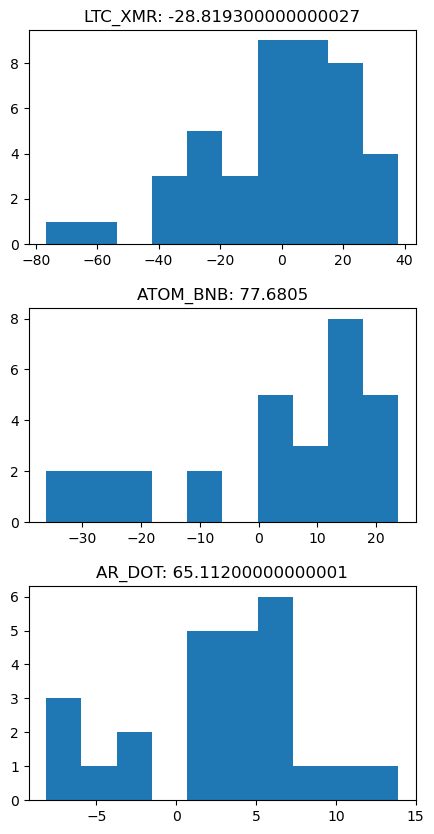

In [271]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

ax1.hist(trades_LTC_XMR.profit)
ax1.set_title(f'LTC_XMR: {trades_LTC_XMR.profit.sum()}')

ax2.hist(trades_ATOM_BNB.profit)
ax2.set_title(f'ATOM_BNB: {trades_ATOM_BNB.profit.sum()}')

ax3.hist(trades_AR_DOT.profit)
ax3.set_title(f'AR_DOT: {trades_AR_DOT.profit.sum()}')

# Изменяем размер фигуры
fig.set_size_inches(5, 10)

plt.subplots_adjust(hspace=0.3)

plt.show()

# Проверка на нормальность

# Тест Шапиро-Уилка

In [46]:
from scipy.stats import shapiro

 - Тест Шапиро-Уилка https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
 - Чувствителен к выбросам в данных, что может привести к неправильным выводам о нормальности распределения. В некоторых случаях используют другие тесты на нормальность, такие как тест Колмогорова-Смирнова или тест Лиллиефорса.
  - Тест Шапиро-Уилка полезен для определения, можно ли применять параметрические статистические методы (такие как t-тест, дисперсионный анализ и регрессионный анализ) к данным. Если гипотеза о нормальности отвергается, следует рассмотреть использование непараметрических методов, таких как тест Манна-Уитни, тест Крускалла-Уолллиса или ранговая корреляция Спирмена

 - Нулевая гипотеза (H0) для теста Шапиро-Уилка состоит в том, что данные имеют нормальное распределение. Альтернативная гипотеза (H1) состоит в том, что данные не имеют нормального распределения.
 - Статистика W является значением статистики теста Шапиро-Уилка, которое указывает на степень согласия данных с нормальным распределением. Значение W находится в диапазоне от 0 до 1. Значение, близкое к 1, указывает на то, что данные более вероятно имеют нормальное распределение, в то время как значение, близкое к 0, указывает на сильное отклонение от нормальности
 - P-value представляет собой вероятность получить такую же статистику W или более экстремальную при условии, что нулевая гипотеза верна. P-value используется для определения того, следует ли отвергнуть нулевую гипотезу на заданном уровне значимости (обычно 0.05).

Alpha (α) — это уровень значимости, который используется в статистических тестах для определения порога, при котором мы принимаем решение об отклонении или неотклонении нулевой гипотезы. Обычно α устанавливается равным 0.05, хотя в зависимости от ситуации и требуемой точности может быть выбран другой уровень значимости, например 0.01 или 0.10.

Уровень значимости α представляет собой вероятность ошибочно отклонить нулевую гипотезу, когда она на самом деле верна. Это также называется ошибкой первого рода. С другой стороны, вероятность принять нулевую гипотезу, когда она на самом деле неверна, называется ошибкой второго рода. Уровень значимости помогает балансировать между этими двумя видами ошибок.

Если p-value меньше α, это означает, что вероятность получить такие или более экстремальные результаты при условии, что нулевая гипотеза верна, очень низка. В этом случае мы считаем, что имеем достаточно оснований отклонить нулевую гипотезу в пользу альтернативной гипотезы.

In [55]:
alpha = 0.05
print('Tест Шапиро-Уилка')
print('------------------------------')
print('------------------------------')

W, p_value = shapiro(trades_LTC_XMR.profit)
print('XMR_LTC:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

W, p_value = shapiro(trades_ATOM_BNB.profit)
print('ATOM_BNB:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')


W, p_value = shapiro(trades_AR_DOT.profit)
print('AR_DOT:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

Tест Шапиро-Уилка
------------------------------
------------------------------
XMR_LTC:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------
ATOM_BNB:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------
AR_DOT:
Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение
------------------------------


# Тест Колмогорова-Смирнова

In [57]:
from scipy.stats import kstest

Тест Колмогорова-Смирнова (K-S тест) - это статистический тест, используемый для проверки соответствия распределения данных теоретическому распределению. Он основан на сравнении двух функций распределения: теоретической и эмпирической (полученной из данных)
- K-S тест непараметрический: он не зависит от параметров распределения. Это означает, что вы можете использовать его для проверки соответствия любого распределения, независимо от того, какие параметры оно имеет.
- K-S тест чувствителен к форме распределения: он может выявлять различия между распределениями, которые отличаются не только параметрами, но и формой распределения. Например, он может показать, что данные не соответствуют нормальному распределению, даже если они имеют похожие параметры.
- K-S тест чувствителен к размеру выборки: при увеличении размера выборки увеличивается чувствительность теста, что позволяет более точно определить, является ли распределение данных теоретическому распределению.
- K-S тест независим от среднего и стандартного отклонения: он сравнивает только функции распределения и не учитывает никакие меры центральной тенденции или разброса данных, такие как среднее или стандартное отклонение.

In [65]:
alpha = 0.05
print('Tест Колмогорова-Смирнова')
print('------------------------------')
print('------------------------------')

kstest_result = kstest(trades_LTC_XMR.profit,'norm')
p_value = kstest_result.pvalue
print('XMR_LTC:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

kstest_result = kstest(trades_ATOM_BNB.profit,'norm')
p_value = kstest_result.pvalue
print('ATOM_BNB:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')


kstest_result = kstest(trades_AR_DOT.profit,'norm')
p_value = kstest_result.pvalue
print('AR_DOT:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

Tест Колмогорова-Смирнова
------------------------------
------------------------------
XMR_LTC:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------
ATOM_BNB:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------
AR_DOT:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------


# Тест Лиллиефорса

In [74]:
from scipy.stats import normaltest

In [75]:
alpha = 0.05
print('Tест Колмогорова-Смирнова')
print('------------------------------')
print('------------------------------')


lilliefors_result = normaltest(trades_LTC_XMR.profit)
p_value = lilliefors_result.pvalue
print('XMR_LTC:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

lilliefors_result = normaltest(trades_ATOM_BNB.profit)
p_value = lilliefors_result.pvalue

print('ATOM_BNB:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')


lilliefors_result = normaltest(trades_AR_DOT.profit)
p_value = lilliefors_result.pvalue

print('AR_DOT:')
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, данные не имеют нормальное распределение")
else:
    print("Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение")
print('------------------------------')

Tест Колмогорова-Смирнова
------------------------------
------------------------------
XMR_LTC:
Отклоняем нулевую гипотезу, данные не имеют нормальное распределение
------------------------------
ATOM_BNB:
Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение
------------------------------
AR_DOT:
Не можем отклонить нулевую гипотезу, данные могут иметь нормальное распределение
------------------------------


# 